## Stroke Risk Assessment Using Machine Learning: Modeling

Strokes are a leading cause of death and disability globally, affecting millions of people each year. Even with all the progress we've made in medicine, accurately predicting the risk of stroke remains a challenge to date. This dataset is used to develop a predictive model that accurately assesses the risk of stroke in individuals based on various features like gender, age,bmi, heart disease, and others. Each row in the data provides relevant information about the patient.

In [225]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [226]:
#Loading the dataset
file_path = '/Users/shubray/Desktop/healthcare-dataset-stroke-data.csv'
stroke_data = pd.read_csv(file_path)

In [227]:
# Summary of the dataset
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [228]:
# Summarizing the missing data count for each column
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [229]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [230]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [231]:
# Handling the missing value
stroke_data["bmi"]=stroke_data["bmi"].fillna(stroke_data["bmi"].mean())

In [232]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [233]:
#Dropping irrelevant id column
train= stroke_data.drop(['id'],axis=1)
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [234]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [235]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

## Converting Categorical Features into Numerical using One-Hot Encoding


In [237]:
# One-Hot Encoding the categorical variables
# This converts categorical variables into binary columns
train_data_cat_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cat_encoded.astype(int).head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [238]:
# Concatenating the encoded categorical data with numerical data
data=pd.concat([train_data_cat_encoded,train_data_num],axis=1,join="outer")

# Convert boolean columns (True/False) to 0 and 1
data = data.astype(int)
data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,67,0,1,228,36,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,61,0,0,202,28,1
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,80,0,1,105,32,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,49,0,0,171,34,1
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,79,1,0,174,24,1


## Separating dependant and independant features

In [240]:
y = data['stroke'] # Dependent feature (target)
x = data.drop('stroke', axis = 1) # Independent features (predictors)

In [241]:
print(x.shape)
print(y.shape)

(5110, 21)
(5110,)


In [242]:
# Scaling with StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.18950991,  1.18998977, -0.01399046, ...,  4.18503199,
         2.70243779,  0.98456631],
       [ 0.84068236, -0.84034336, -0.01399046, ..., -0.2389468 ,
         2.12811691, -0.05605292],
       [-1.18950991,  1.18998977, -0.01399046, ...,  4.18503199,
        -0.01454174,  0.46425669],
       ...,
       [ 0.84068236, -0.84034336, -0.01399046, ..., -0.2389468 ,
        -0.52259482,  0.20410188],
       [-1.18950991,  1.18998977, -0.01399046, ..., -0.2389468 ,
         1.33290339, -0.44628514],
       [ 0.84068236, -0.84034336, -0.01399046, ..., -0.2389468 ,
        -0.45632703, -0.31620773]])

## Splitting the Dataset into Training and Testing Sets

The dataset is split into training and testing sets, with 70% of the data used for training and 30% used for testing.

In [244]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((3577, 21), (1533, 21))

## Building Classifiers

In [246]:
# Initialize the accuracy dictionary
accuracy = {}

#### Training a Logistic Regression Classifier

In [248]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

#### Predict using the logistic regression model

In [250]:
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))


0.9471624266144814


The accuracy score of 0.947 indicates that the model is performing well, with a high percentage of correct predictions. The model correctly predicted 94.7% of the test cases.

####  Confusion Matrix

In [253]:
# Confusion Matrix for Logistic Regression (without normalization)
conf_matrix_without_norm = confusion_matrix(y_test, y_pred1)

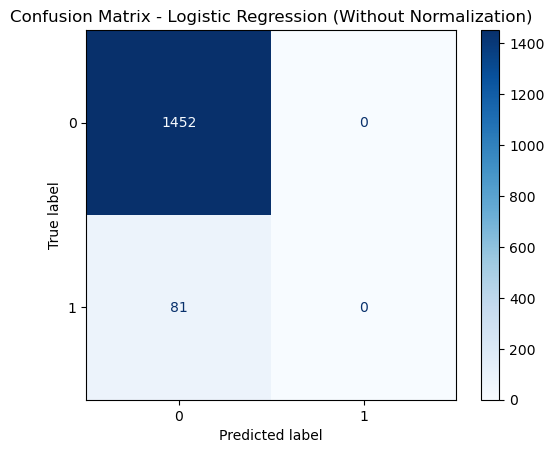

In [254]:
# Plot the confusion matrix without normalization
disp_without_norm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_without_norm, display_labels=lr.classes_)
disp_without_norm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression (Without Normalization)")
plt.show()

This matrix gives a detailed breakdown of the model's performance, which goes beyond just the accuracy score. It helps understand how well the model is doing in terms of correctly classifying both classes (stroke and no stroke).

In [256]:
# Classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier

In [258]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(dtc)] = accuracy_score(y_test, y_pred2)*100

0.9471624266144814


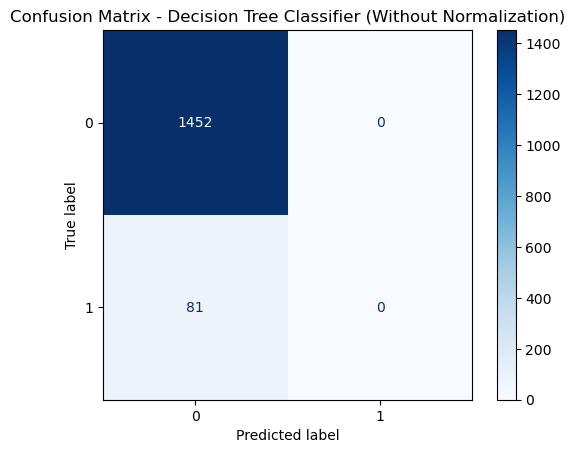

In [259]:
# Confusion Matrix for the Decision Tree Classifier (without normalization)
conf_matrix_dtc = confusion_matrix(y_test, y_pred2)

# Plot the confusion matrix without normalization
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dtc, display_labels=dtc.classes_)
disp_dtc.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree Classifier (Without Normalization)")
plt.show()

In [265]:
# Classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier

In [362]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test, y_pred3)*100

0.9471624266144814


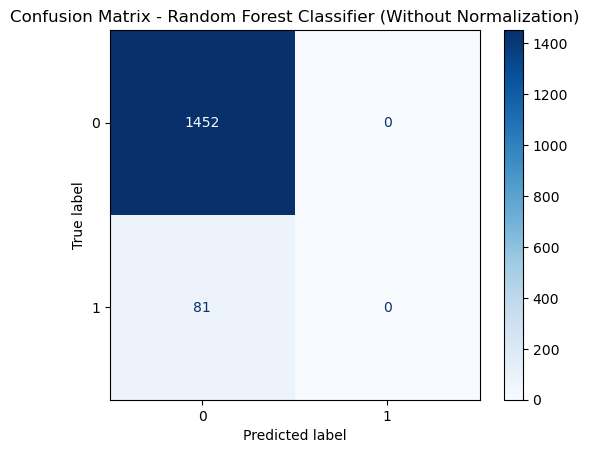

In [364]:
# Confusion Matrix for Random Forest Classifier
conf_matrix_rfc = confusion_matrix(y_test, y_pred3)

# Plot the confusion matrix without normalization
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc, display_labels=rfc.classes_)
disp_rfc.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest Classifier (Without Normalization)")
plt.show()


In [269]:
# Classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting Classifier

In [271]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test, y_pred4)*100

0.9471624266144814


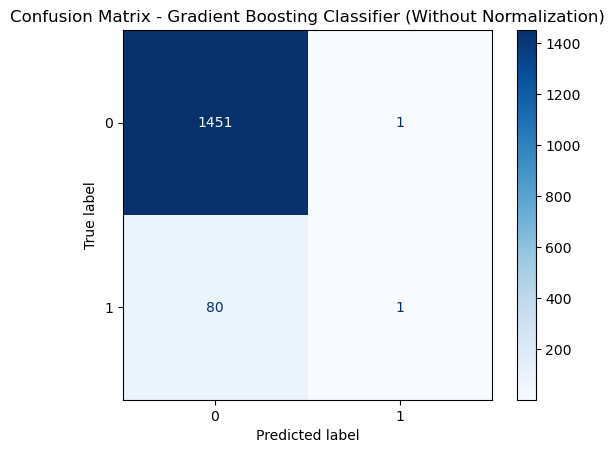

In [367]:
# Confusion Matrix for Gradient Boosting Classifier
conf_matrix_gbc = confusion_matrix(y_test, y_pred4)

# Plot the confusion matrix without normalization
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gbc, display_labels=gbc.classes_)
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting Classifier (Without Normalization)")
plt.show()


In [371]:
#classification report for Gradient Boosting Classifier
classification_report_gbc = classification_report(y_test, y_pred4)

# Print the classification report
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report_gbc)


Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.50      0.01      0.02        81

    accuracy                           0.95      1533
   macro avg       0.72      0.51      0.50      1533
weighted avg       0.92      0.95      0.92      1533



### Conclusion

In this project, I used four machine learning models to predict stroke risk: Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting. Logistic Regression, a simple model for classifying two possible outcomes, didn’t predict stroke cases because of the imbalanced dataset, leading to 0 precision and recall for stroke prediction. The Decision Tree model, which splits the data into groups based on certain features, had the same problem and also failed to predict strokes. Random Forest, which combines multiple decision trees, still leaned heavily toward predicting no strokes.
However, the Gradient Boosting model, which builds on mistakes from earlier models to improve accuracy, showed some improvement by correctly predicting a few stroke cases. It had a precision of 0.50, meaning half of its predictions for strokes were correct, but it only identified a tiny percentage of actual stroke cases, with a recall of 0.01. All the models had about the same accuracy (94.7%), but Gradient Boosting performed the best overall in predicting strokes, even though the imbalanced data made it challenging.

### Applying SMOTE to handle class imbalance

In [403]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

### Logistic Regression with SMOTE

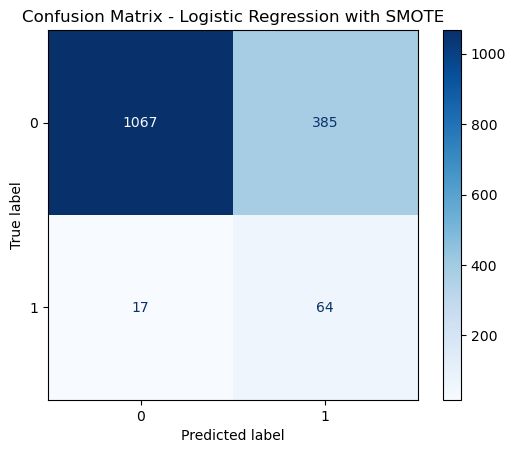

In [397]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=7)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model again with the balanced data
lr_sm = LogisticRegression(max_iter=200)
lr_sm.fit(X_train_sm, y_train_sm)

# Predict using the model trained on balanced data
y_pred_sm = lr_sm.predict(X_test)

# Confusion Matrix
conf_matrix_sm = confusion_matrix(y_test, y_pred_sm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sm, display_labels=lr_sm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression with SMOTE")
plt.show()

In [401]:
# Logistic Regression with balanced class weights
lr_smote = LogisticRegression(class_weight='balanced', max_iter=200)
lr_smote.fit(X_train_res, y_train_res)

# Predictions on the test set
y_pred_lr_smote = lr_smote.predict(X_test)

# Generate classification report
classification_report_lr_smote = classification_report(y_test, y_pred_lr_smote)
print(classification_report_lr_smote)

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1452
           1       0.14      0.79      0.24        81

    accuracy                           0.74      1533
   macro avg       0.56      0.76      0.54      1533
weighted avg       0.94      0.74      0.81      1533



In [405]:
# Predictions on test set (probabilities for the positive class 'stroke = 1')
y_pred_proba_lr_smote = lr_smote.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_lr_smote)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.8215828316838416


### Decision Tree Classifier with SMOTE

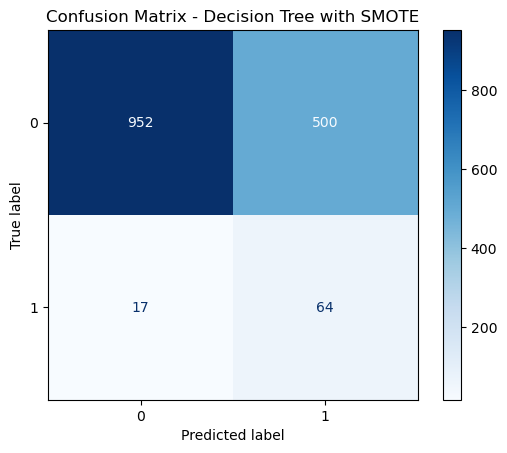

In [411]:
# Train Decision Tree Classifier on SMOTE-balanced data
dt_sm = DecisionTreeClassifier(max_depth=3)
dt_sm.fit(X_train_sm, y_train_sm)

# Predict using the Decision Tree model trained on balanced data
y_pred_dt_sm = dt_sm.predict(X_test)

# Confusion Matrix for Decision Tree Classifier
conf_matrix_dt_sm = confusion_matrix(y_test, y_pred_dt_sm)

# Plot the confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt_sm, display_labels=dt_sm.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree with SMOTE")
plt.show()

In [415]:
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt_sm)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Classification Report
dt_classification_report = classification_report(y_test, y_pred_dt_sm)
print(f"Decision Tree Classification Report:\n{dt_classification_report}")

# ROC-AUC Score
y_pred_prob_dt_sm = dt_sm.predict_proba(X_test)[:, 1]
dt_roc_auc = roc_auc_score(y_test, y_pred_prob_dt_sm)
print(f"Decision Tree ROC-AUC Score: {dt_roc_auc}")

Decision Tree Accuracy: 0.6627527723418134
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1452
           1       0.11      0.79      0.20        81

    accuracy                           0.66      1533
   macro avg       0.55      0.72      0.49      1533
weighted avg       0.94      0.66      0.76      1533

Decision Tree ROC-AUC Score: 0.7938178077066966


### Random Forest Classifier with SMOTE

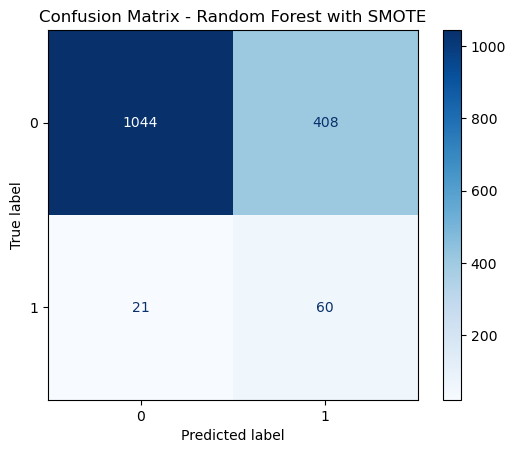

In [420]:
# Train Random Forest Classifier on SMOTE-balanced data
rf_sm = RandomForestClassifier(max_depth=5, random_state=7)
rf_sm.fit(X_train_sm, y_train_sm)

# Predict using the Random Forest model trained on balanced data
y_pred_rf_sm = rf_sm.predict(X_test)

# Confusion Matrix for Random Forest Classifier
conf_matrix_rf_sm = confusion_matrix(y_test, y_pred_rf_sm)

# Plot the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf_sm, display_labels=rf_sm.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest with SMOTE")
plt.show()

In [438]:
# Accuracy
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Accuracy: {rfc_accuracy}")

# Classification Report
rfc_classification_report = classification_report(y_test, y_pred_rfc)
print(f"Random Forest Classification Report:\n{rfc_classification_report}")

# ROC-AUC Score
y_pred_prob_rfc_sm = rfc.predict_proba(X_test)[:, 1]
rfc_roc_auc = roc_auc_score(y_test, y_pred_prob_rfc_sm)
print(f"Random Forest ROC-AUC Score: {rfc_roc_auc}")

Random Forest Accuracy: 0.7201565557729941
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1452
           1       0.13      0.74      0.22        81

    accuracy                           0.72      1533
   macro avg       0.55      0.73      0.52      1533
weighted avg       0.94      0.72      0.80      1533

Random Forest ROC-AUC Score: 0.7924361459714996


### Gradient Boosting Classifier with SMOTE

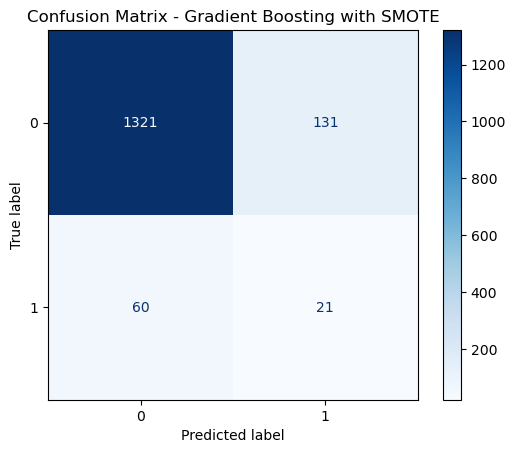

In [445]:
# Train Gradient Boosting Classifier on SMOTE-balanced data
gb_sm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_sm.fit(X_train_sm, y_train_sm)

# Predict using the Gradient Boosting model trained on balanced data
y_pred_gb_sm = gb_sm.predict(X_test)

# Confusion Matrix for Gradient Boosting Classifier
conf_matrix_gb_sm = confusion_matrix(y_test, y_pred_gb_sm)

# Plot the confusion matrix
disp_gb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb_sm, display_labels=gb_sm.classes_)
disp_gb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting with SMOTE")
plt.show()

In [451]:
# Accuracy
gbc_accuracy = accuracy_score(y_test, y_pred_gbc)
print(f"Gradient Boosting Accuracy: {gbc_accuracy}")

# Classification Report
gbc_classification_report = classification_report(y_test, y_pred_gbc)
print(f"Gradient Boosting Classification Report:\n{gbc_classification_report}")

# ROC-AUC Score
y_pred_prob_gbc = gbc.predict_proba(X_test)[:, 1]
gbc_roc_auc = roc_auc_score(y_test, y_pred_prob_gbc)
print(f"Gradient Boosting ROC-AUC Score: {gbc_roc_auc}")

Gradient Boosting Accuracy: 0.8754076973255055
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1452
           1       0.14      0.26      0.18        81

    accuracy                           0.88      1533
   macro avg       0.55      0.58      0.56      1533
weighted avg       0.91      0.88      0.89      1533

Gradient Boosting ROC-AUC Score: 0.7779010645172262


In [461]:
# Comparison of model performances
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [lr_accuracy, dtc_accuracy, rfc_accuracy, gbc_accuracy],
    'ROC AUC': [lr_roc_auc, dtc_roc_auc, rfc_roc_auc, gbc_roc_auc]
})

In [463]:
# Assuming model_performance is the DataFrame
from IPython.display import display

display(model_performance)


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.737769,0.821583
1,Decision Tree,0.662753,0.793818
2,Random Forest,0.720157,0.792436
3,Gradient Boosting,0.875408,0.777901


All models achieved high accuracy scores, around 94.7%(before SMOTE), but more than accuracy alone was needed due to the imbalance in the dataset. SMOTE helped to oversample the minority class (stroke cases), creating a more balanced dataset. After applying SMOTE, I focused more on ROC-AUC and classification metrics like precision, recall, and F1-score, which provided a clearer picture of how well the models performed on stroke cases. While Gradient Boosting has the highest accuracy (87.54%), Logistic Regression has a better ROC AUC score (0.82), which is more critical when working with imbalanced datasets. Gradient Boosting is the best model if I prioritize accuracy, but it performs best if I prioritize ROC AUC: Logistic Regression. 